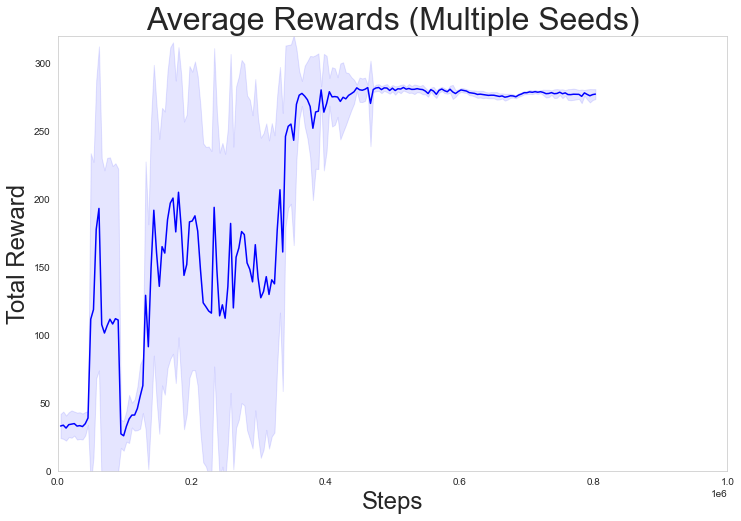

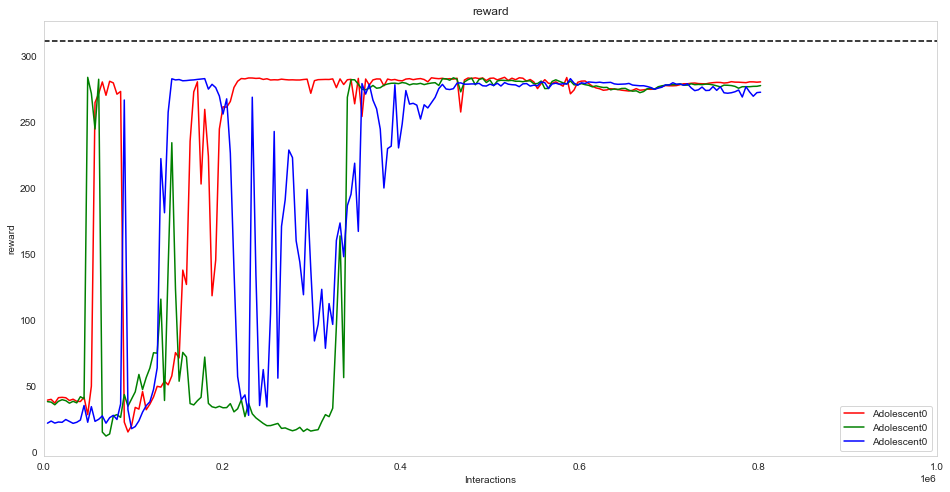

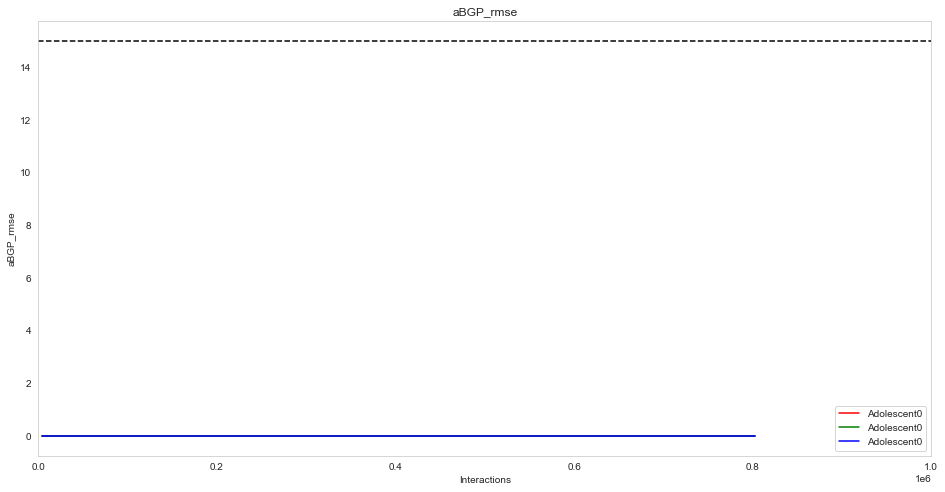

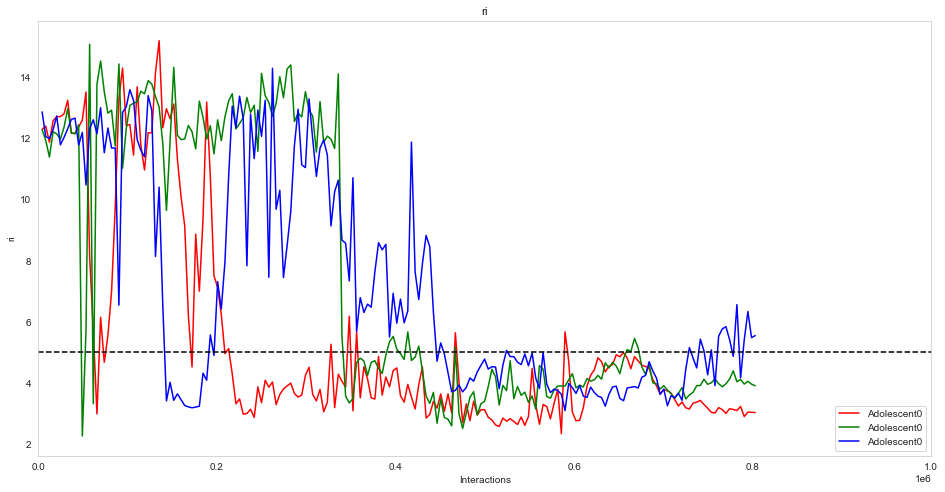

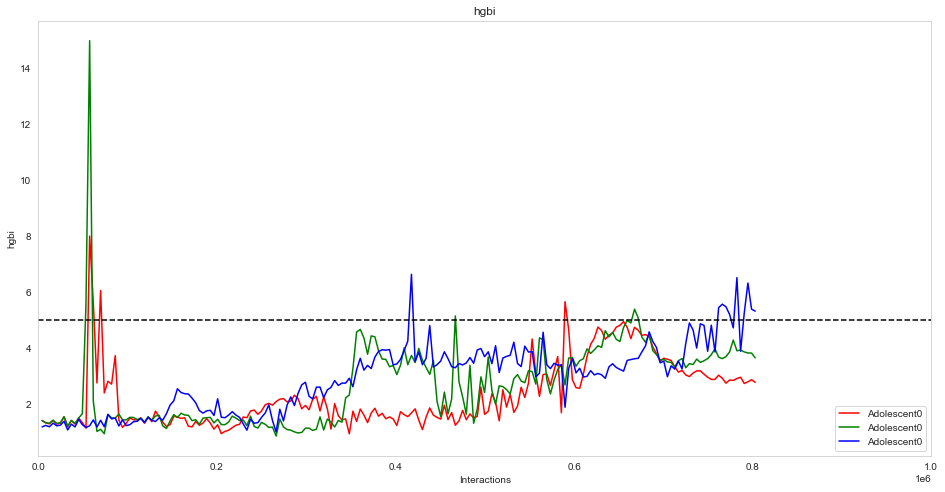

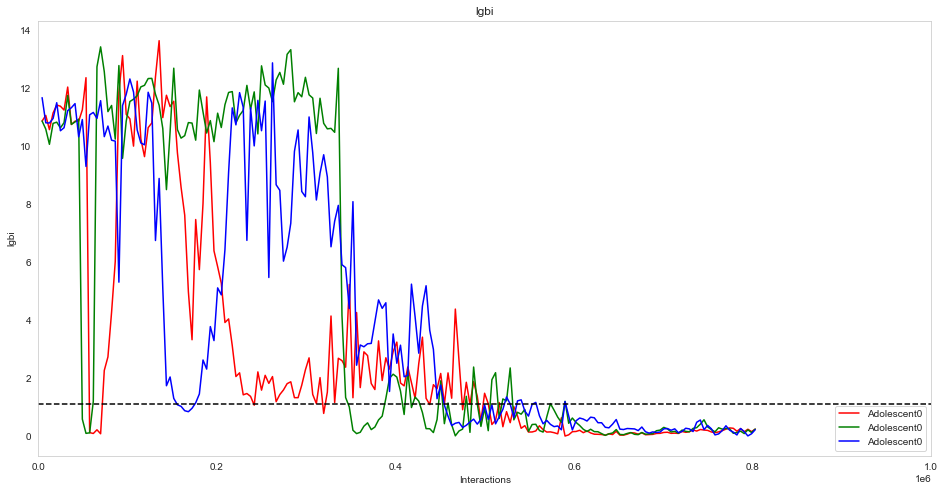

In [34]:
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
# MAIN_PATH = config('MAIN_PATH')
MAIN_PATH = 'C:/Users/davet/Desktop/Thesis/G2P2C/'
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 

# FOLDER = 'nci/May12/adult_easy/'
# ALGO = 'G'
# SUBJECT = '6'
# PATH = FOLDER+ALGO+SUBJECT
# COHORT = 'Adult'

# FOLDER = '/SJ53Experiments/L2RegularisationOnly/Regularisation_1e-1/TD3/Model1/NormDist/sigma_5e-2/' # L2 Regularisation with 0.01 weight decay
# FOLDER = '/SJ53Experiments/L2RegularisationOnly/Regularisation_1e-2/TD3/Model1/NormDist/sigma_5e-2/' # L2 Regularisation with 0.1 weight decay
# FOLDER = '/SJ53Experiments/L2RegularisationOnly/Regularisation_1e-4/TD3/Model1/NormDist/sigma_5e-2/' # L2 Regularisation with 0.1 weight decay
# FOLDER = '/SJ53Experiments/L2RegularisationOnly/Regularisation_1e-3/TD3/Model1/NormDist/sigma_5e-1/' # L2 Regularisation with 0.1 weight decay
# FOLDER = '/L1Norm/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_2e-1/' # L2 Regularisation with 0.1 weight decay
FOLDER = '/L1Norm_LR1e-1/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_2e-1/' # L2 Regularisation with 0.1 weight decay
FOLDER = '/L1Norm_LR1e-1/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_1e0/' # L2 Regularisation with 0.1 weight decay

# FOLDER = '/L1Norm_LR1e-1/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_1e0/' #
FOLDER = '/L1Norm_LR1e-1/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_2e-1/' #
# FOLDER = '/L2Norm_LR1e-1/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_2e-1/'
# FOLDER = '/SJ53Experiments/L2RegularisationOnly_AdamW/Regularisation_1e-3/TD3/Model1/NormDist/sigma_5e-1/' # L2 Regularisation with 0.1 weight decay

#Constraint Coefficient
FOLDER = '/L2Norm_LR1e-1/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_2e-1/' #
# FOLDER = '/L2Norm_LR1e0/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_2e-1/' #
FOLDER = '/L2Norm_LR1e-2/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_2e-1/' #

#L1 vs L2
# FOLDER = '/L1Norm_LR1e-1/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_2e-1/' # L1 constraint type
FOLDER = '/L2Norm_LR1e-1/NoCutOff/NoiseApplication/TD3/Model1/NormDist/sigma_2e-1/' # L2 constraint type


# FOLDER = '/SJ53Experiments/L2RegularisationOnly/Regularisation_1e-2/TD3/Model1/NormDist/sigma_5e-1/' # L2 Regularisation with 0.01 weight decay
# FOLDER = '/SJ53Experiments/L2RegularisationOnly/Regularisation_1e-3/TD3/Model1/NormDist/sigma_5e-1/' # L2 Regularisation with 0.001 weight decay
# FOLDER = '/SJ53Experiments/L2RegularisationOnly_LR1e-4/Regularisation_1e-2/TD3/Model1/NormDist/sigma_5e-1/' # L2 Regularisation with 0.001 weight decay
# FOLDER = '/SJ53Experiments/L2RegularisationOnly_LR1e-4/Regularisation_1e-4/TD3/Model1/NormDist/sigma_5e-1/' # L2 Regularisation with 0.001 weight decay

# FOLDER = '/EU59 Experiments/PenaltyTermSensitivity/TD3/NoCutOff/coefficient1e-2/' # Best performing penalty 
# FOLDER = '/EU59Experiments/PenaltyTermSensitivity/TD3/NoCutOff/coefficient5e-3/' 

#DPG No Penalty
# FOLDER = '/EU59 Experiments/DPG/model1/normal_dist/no_penalty/std2e-1/' # Patient 0
# FOLDER = '/EU59 Experiments/DPG/model1/normal_dist/no_penalty/std5e-2/' # Patient 2
# FOLDER = '/EU59 Experiments/DPG/model1/normal_dist/no_penalty/std5e-2/' # Patient 6

#Effect of constraint on mu
# FOLDER = '/DDPG_NormalDistNoise_NoPenalty/Sigma_1e0/' #No Constraint (-ve mu) patient0?
# FOLDER = '/DDPG_NormalDistNoise_NoPenalty/Sigma_1e0/' #No Constraint (+ve mu)
# FOLDER = '/EU59 Experiments/DDPG/model1/normal_dist/with_penalty/std1e0/' #With Constraint



ALGO = 'TD3'#'DDPG' TD3
SUBJECT = '0'
PATH = FOLDER+ALGO+SUBJECT
COHORT = 'Adolescent'

LABEL = COHORT+SUBJECT

exp1 = ExperimentVisualise(id=PATH+'_1', version=1.1, plot_version=1, test_seeds=5000)
exp2 = ExperimentVisualise(id=PATH+'_2', version=1.1, plot_version=1, test_seeds=5000)
exp3 = ExperimentVisualise(id=PATH+'_3', version=1.1, plot_version=1, test_seeds=5000)

# plot the graphs
command = []
dis_len = 1.0 * 1000000
disp_arr = display_commands_v2(command)
exp_vis = {
             '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":LABEL}, 
             '2':{ "id":exp2, "color":'g',"show": disp_arr[2], "label":LABEL},  
             '3':{ "id":exp3, "color":'b',"show": disp_arr[3], "label":LABEL}, 
}
# average metric
plot_testing_average_metric(exp_vis, [['1', '2', '3']], type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)

#individual seed metrics
plot_testing_metric(exp_vis, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=False, label=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='aBGP_rmse', goal=15, fill=False)
#plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='cBGP_rmse', goal=10, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='normo', goal=70, fill=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='ri', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='hgbi', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='lgbi', goal=1.1, fill=False)
#plot_training_logs(exp_vis, dis_len, version=3)

params = ['policy_loss', 'value_loss', 'pi_grad', 'val_grad'] #, 'pi_loss'
# params = ['policy_grad', 'value_grad'] #, 'pi_loss'

# plot_training_logs(mode='ppo', exp_dict=exp_vis, dis_len=dis_len, params=params)
#params = ['pi_aux_grad'] #'pi_aux_loss', 'vf_aux_loss', vf_aux_grad 
# plot_training_logs(mode='aux', exp_dict=exp_vis, dis_len=250, params=params)
#params = ['plan_grad', 'plan_loss'] 
# plot_training_logs(mode='planning', exp_dict=exp_vis, dis_len=250, params=params)    


 Experiment summary...
{'epi': {195: 197}, 't': {195: 288}, 'reward': {195: 280.75244}, 'normo': {195: 94.79166666666669}, 'hypo': {195: 0.0}, 'sev_hypo': {195: 0.0}, 'hyper': {195: 5.208333333333333}, 'lgbi': {195: 0.09937414}, 'hgbi': {195: 2.7857063}, 'ri': {195: 2.8850803}, 'sev_hyper': {195: 0.0}, 'aBGP_rmse': {195: 0}, 'cBGP_rmse': {195: 0}}
{'epi': {195: 197}, 't': {195: 288}, 'reward': {195: 279.79248}, 'normo': {195: 92.36111111111111}, 'hypo': {195: 0.0}, 'sev_hypo': {195: 0.0}, 'hyper': {195: 7.638888888888889}, 'lgbi': {195: 0.19515894}, 'hgbi': {195: 3.1005502}, 'ri': {195: 3.2957091}, 'sev_hyper': {195: 0.0}, 'aBGP_rmse': {195: 0}, 'cBGP_rmse': {195: 0}}
{'epi': {195: 197}, 't': {195: 288}, 'reward': {195: 280.53226}, 'normo': {195: 94.44444444444444}, 'hypo': {195: 0.0}, 'sev_hypo': {195: 0.0}, 'hyper': {195: 5.555555555555555}, 'lgbi': {195: 0.17437002}, 'hgbi': {195: 3.0158756}, 'ri': {195: 3.1902456}, 'sev_hyper': {195: 0.0}, 'aBGP_rmse': {195: 0}, 'cBGP_rmse': {195:

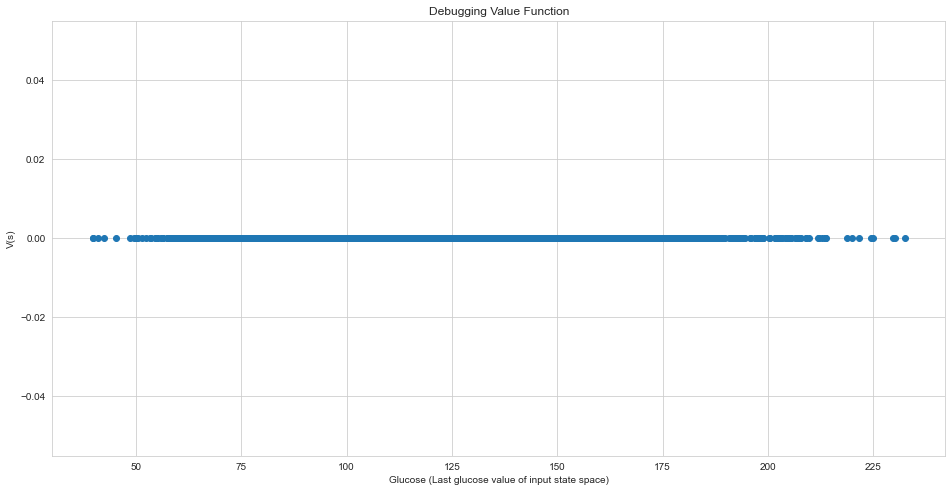

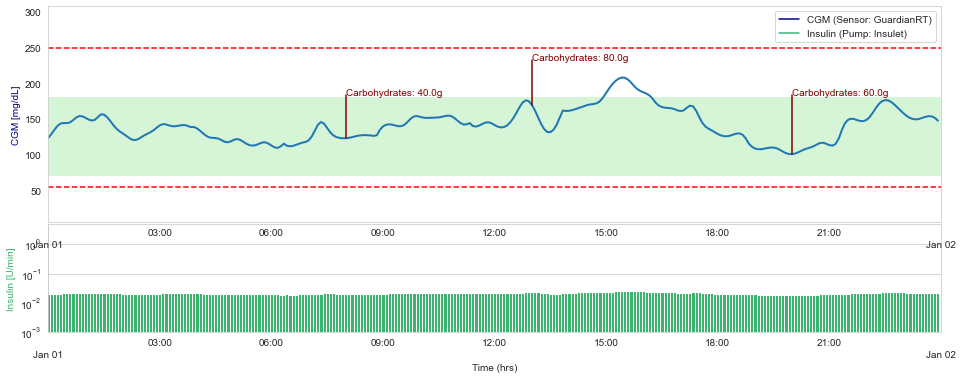

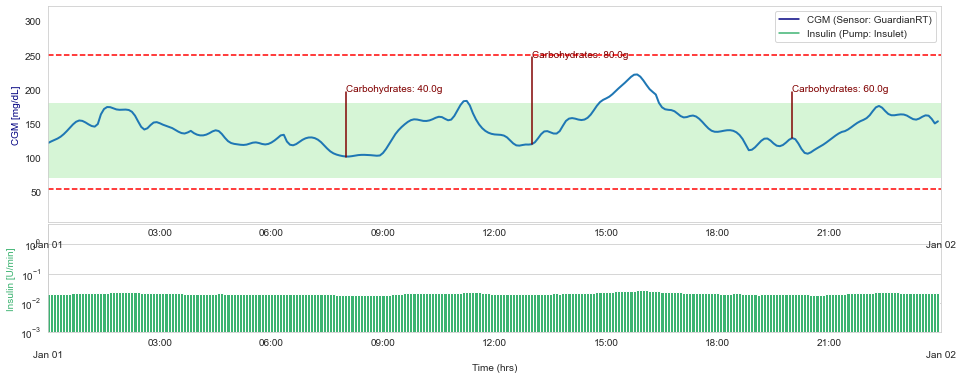

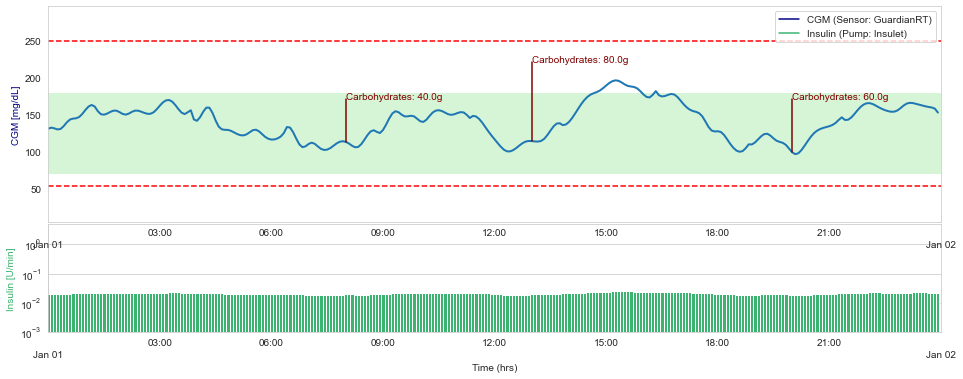

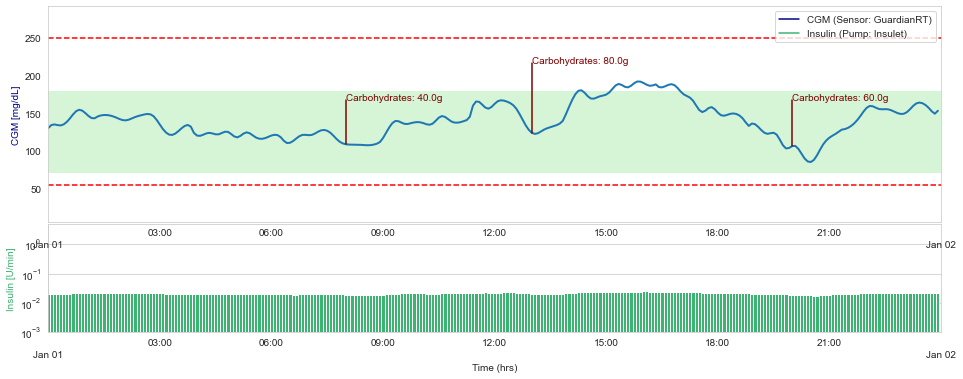

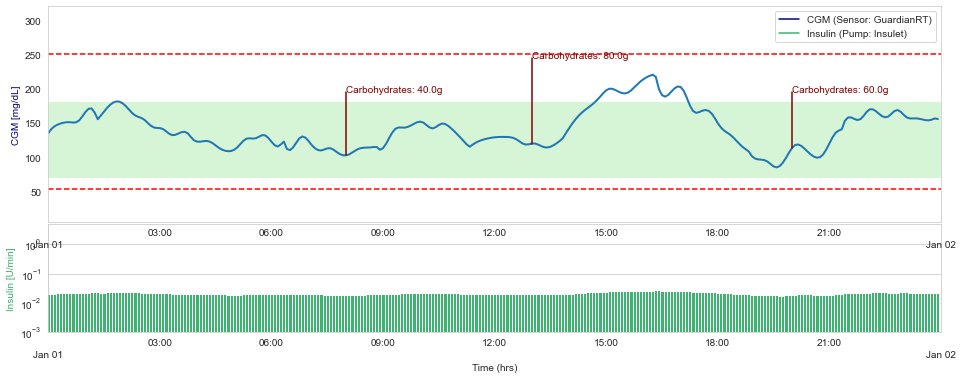

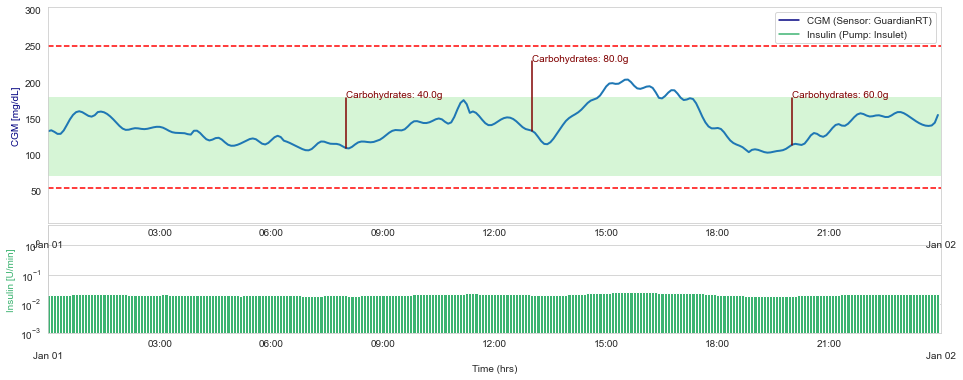

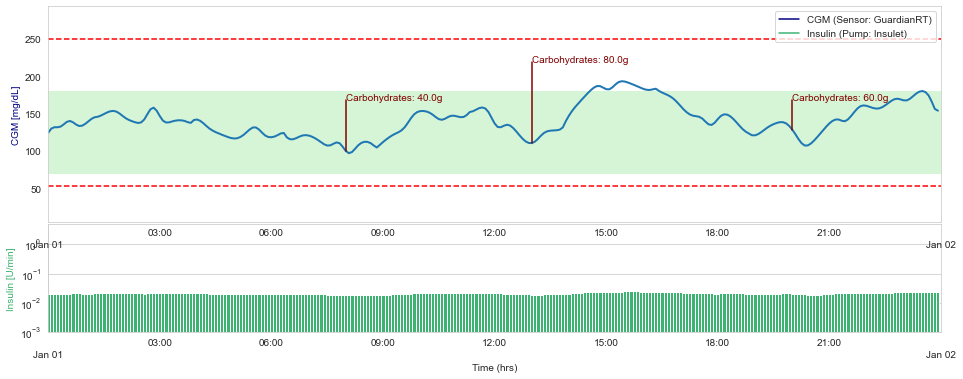

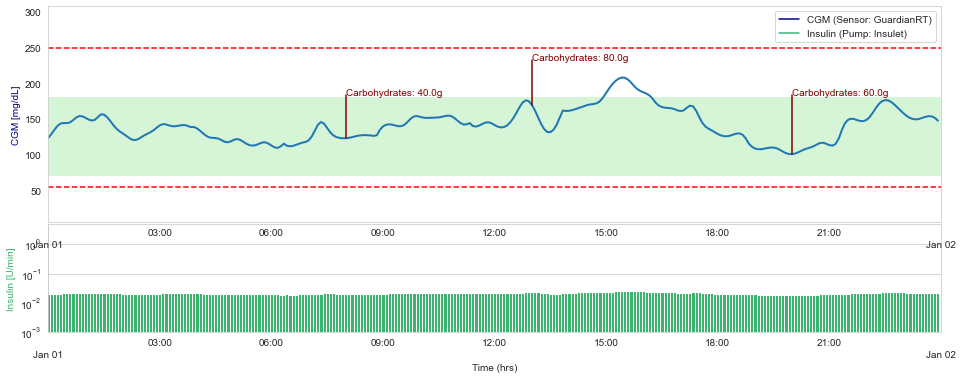

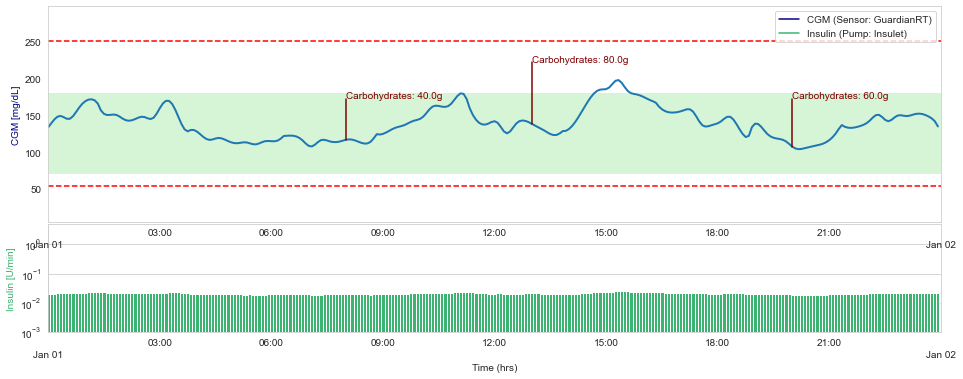

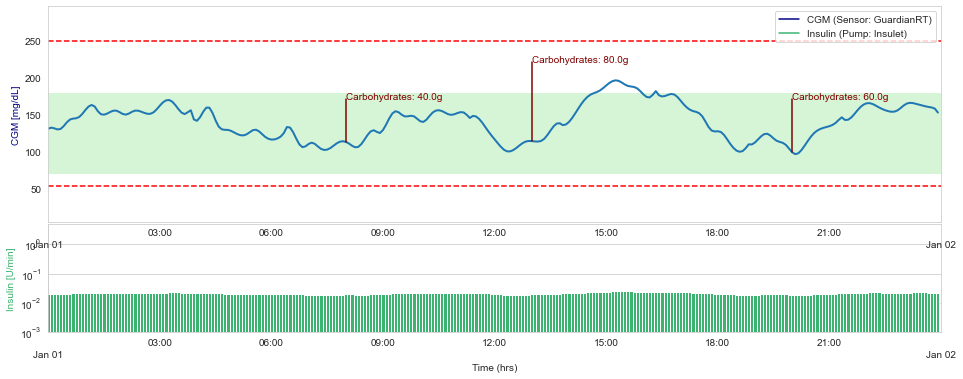

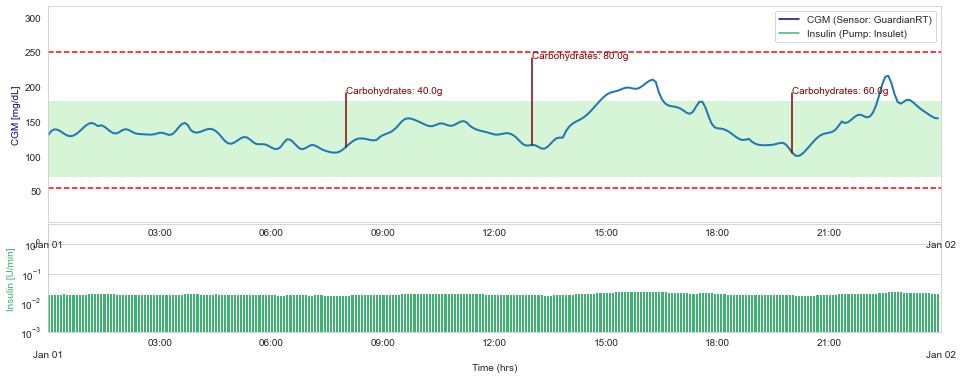

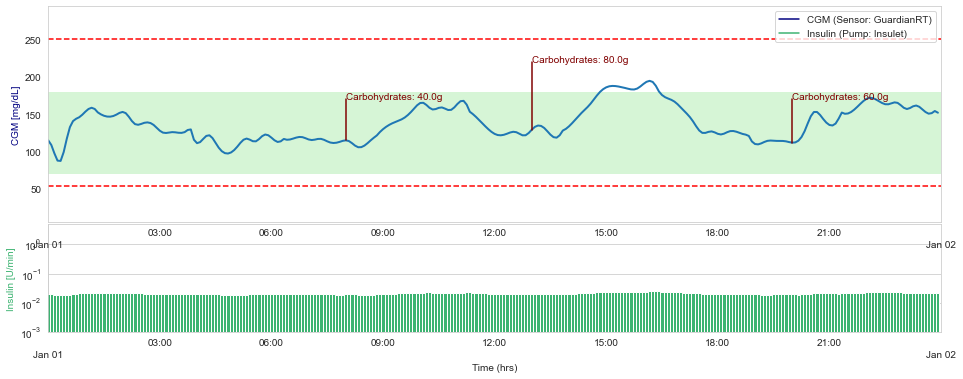

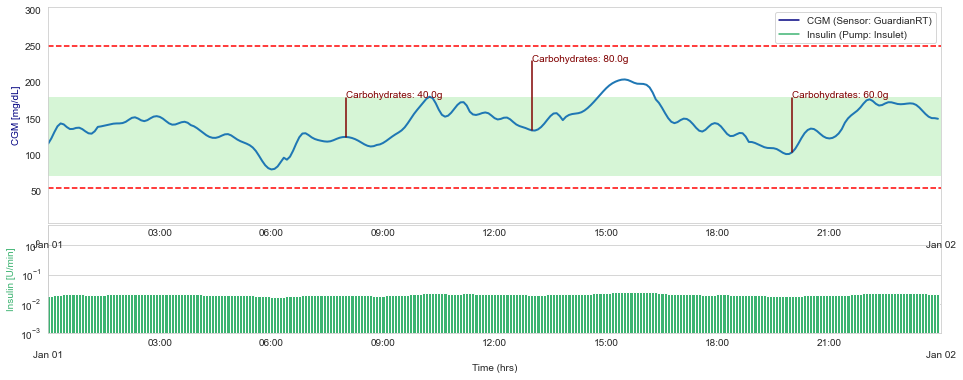

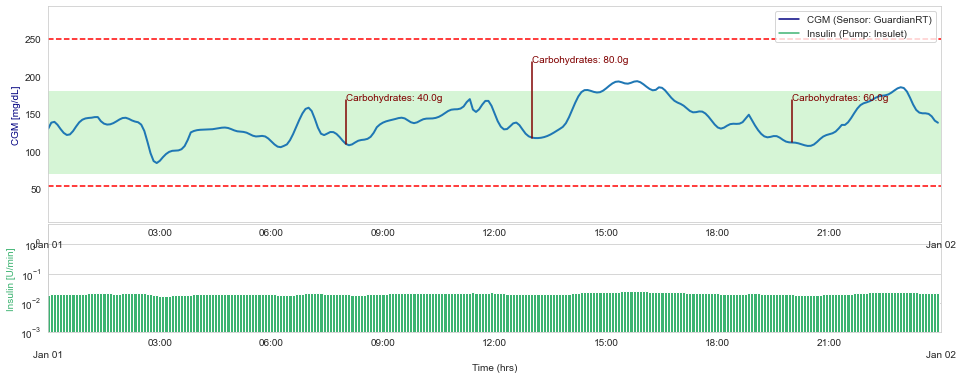

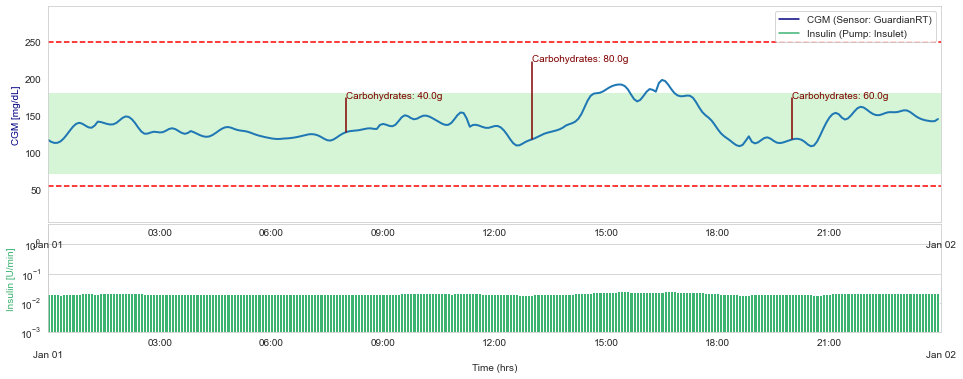

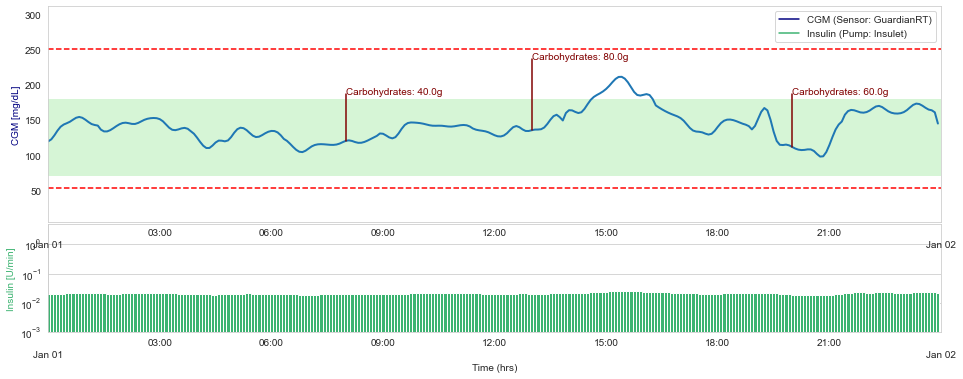

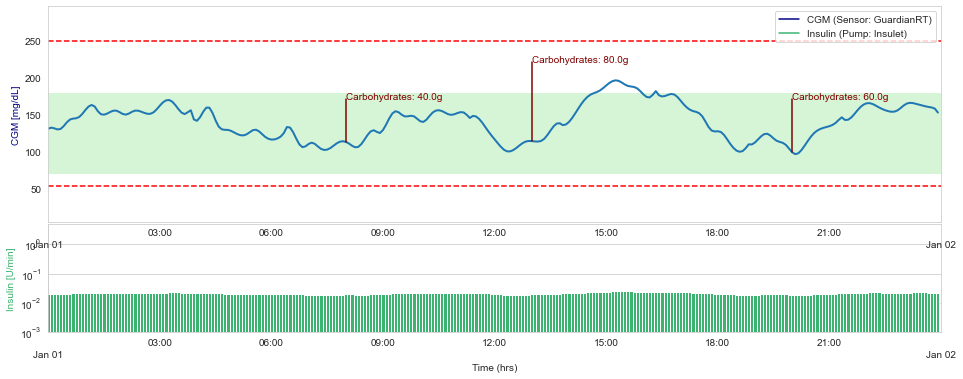

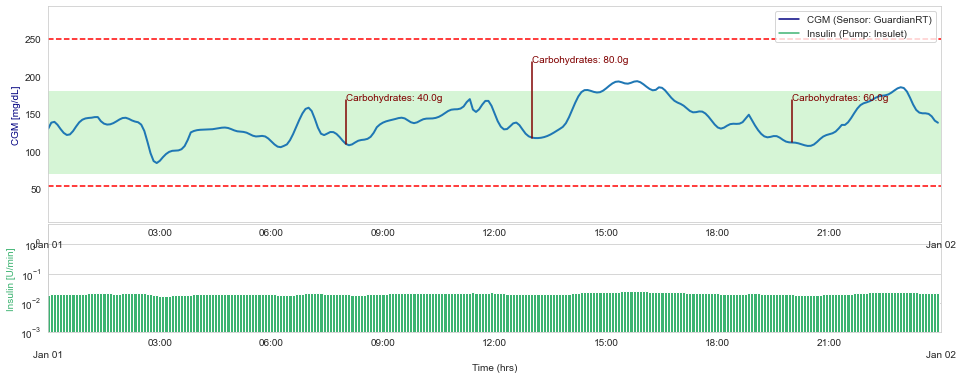

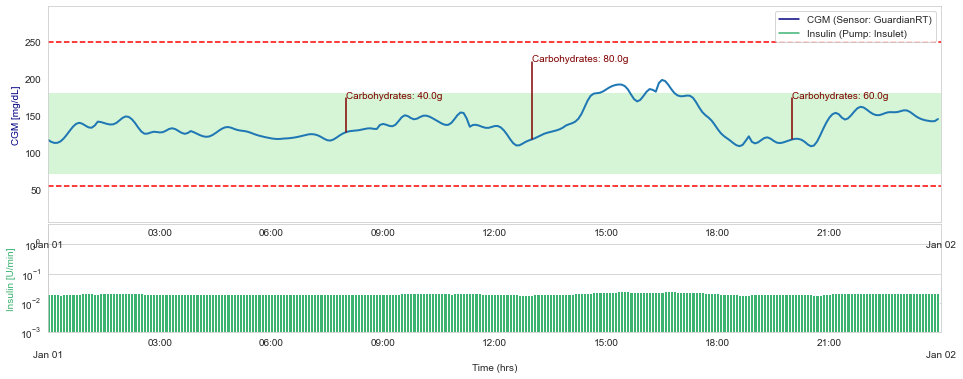

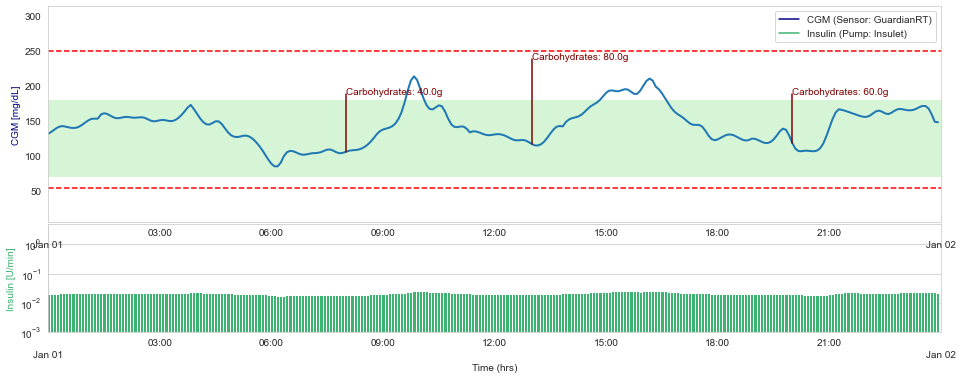

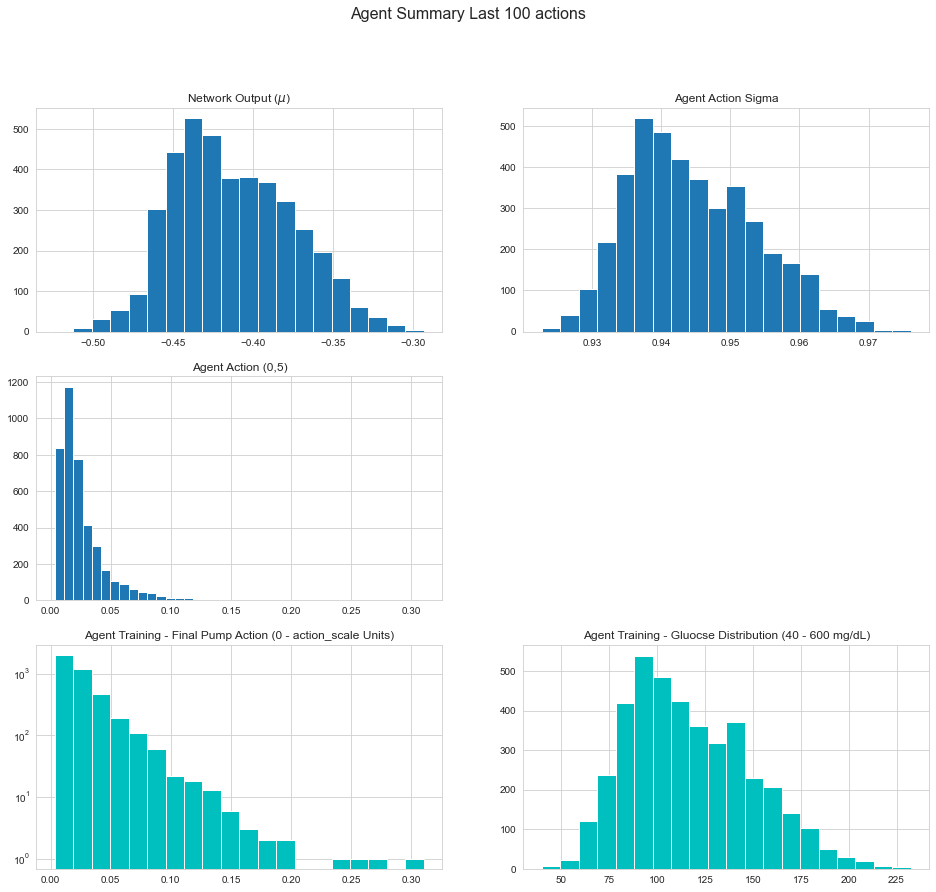

In [35]:

## debugging a given experiment
target_exp = exp1
latest_epi = target_exp.get_summary()
target_epi = latest_epi#10   latest_epi
plot_value_function(target_exp, horizon=256)
for t in range(0, target_exp.testing_workers):
    plot_episode(target_exp, tester=t, episode=target_epi)
plot_training_action_summary(target_exp, horizon=256)

In [72]:
target_exp.get_test_episode(0, 135)


,epi,t,cgm,meal,ins,rew,rl_ins,mu,sigma,prob,state_val,day_hour,day_min,IS,time
27006,135.0,0.0,131.21399,0.0,0.0,0.991767,0.0,NaN,NaN,0.0,0.0,0,0,0.0,2018-01-01 00:00:00
27007,135.0,1.0,132.69786,0.0,0.0,0.990516,0.0,NaN,NaN,0.0,0.0,0,5,0.0,2018-01-01 00:05:00
27008,135.0,2.0,131.66734,0.0,0.0,0.991393,0.0,NaN,NaN,0.0,0.0,0,10,0.0,2018-01-01 00:10:00
27009,135.0,3.0,130.22600,0.0,0.0,0.992557,0.0,NaN,NaN,0.0,0.0,0,15,0.0,2018-01-01 00:15:00
27010,135.0,4.0,130.88684,0.0,0.0,0.992032,0.0,NaN,NaN,0.0,0.0,0,20,0.0,2018-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27192,135.0,186.0,581.78220,0.0,0.0,0.036934,0.0,NaN,NaN,0.0,0.0,15,30,0.0,2018-01-01 15:30:00
27193,135.0,187.0,586.93330,0.0,0.0,0.026448,0.0,NaN,NaN,0.0,0.0,15,35,0.0,2018-01-01 15:35:00
27194,135.0,188.0,593.31726,0.0,0.0,0.013499,0.0,NaN,NaN,0.0,0.0,15,40,0.0,2018-01-01 15:40:00
27195,135.0,189.0,598.94190,0.0,0.0,0.002133,0.0,NaN,NaN,0.0,0.0,15,45,0.0,2018-01-01 15:45:00


In [7]:
exp_vis['1']['id'].get_training_logs()

,policy_loss,value_loss,pi_grad,val_grad,steps
0,11.314967,0.064527,0.005875,-1.149703,4096
1,10.435221,0.063836,0.005191,-1.455631,8192
2,11.311106,0.062808,0.003994,-1.007413,12288
3,12.174485,0.062236,0.003763,-0.629585,16384
4,6.113553,0.061491,0.003399,-3.223813,20480
...,...,...,...,...,...
66,5.987942,0.019345,0.003331,-3.801375,274432
67,8.603450,0.018535,0.004269,-2.370836,278528
68,10.343272,0.017986,0.005011,-1.463988,282624
69,7.736122,0.017344,0.005290,-2.935175,286720


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


filter_bad = False

target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
FOLDER_PATH='/results/embc14_real'
control_type = 'real'
f1 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f1[f1['survival'] < 312].count()['survival']
print('real')
print(failures)
if filter_bad:
    f1 = f1[f1['survival'] == 312]
t1 = f1[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t1)

FOLDER_PATH='/results/embc14_quadratic'
control_type = 'quadratic'
f2 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f2[f2['survival'] < 312].count()['survival']
print('quadratic')
print(failures)
if filter_bad:
    f2 = f2[f2['survival'] == 312]
t2 = f2[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t2)

if filter_bad:
    sum_stats = sum_stats[sum_stats['t'] == 312]
c = sns.color_palette() 

fig = plt.figure(figsize=(8, 6))
plt.subplot(3, 3, 1)
g2 = sns.violinplot(y=f1['normo'])
g2.set(ylabel="TIR")
g2.set(ylim=(0, 100))
plt.title("SBB")

plt.subplot(3, 3, 2)
g2 = sns.violinplot(y=f2['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("SBBHE")
#plt.ylabel()

plt.subplot(3, 3, 3)
g2 = sns.violinplot(y=sum_stats['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("Proposed Method")

plt.subplot(3, 3, 4)
g2 = sns.violinplot(y=f1['lgbi'], color=c[1])
g2.set(ylabel="LBGI")
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 5)
g2 = sns.violinplot(y=f2['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 6)
g2 = sns.violinplot(y=sum_stats['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 7)
g2 = sns.violinplot(y=f1['hgbi'], color=c[2])
g2.set(ylabel="HBGI")
g2.set(ylim=(0, 40))


plt.subplot(3, 3, 8)
g2 = sns.violinplot(y=f2['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

plt.subplot(3, 3, 9)
g2 = sns.violinplot(y=sum_stats['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

# sns.violinplot(y=sum_stats['normo'])
#axes.violinplot(dataset = [sum_stats['normo'].values],  showmedians=True, showmeans=True)
# axes.set_xticks([1])
# axes.set_xticklabels(["Normoglyceamia", ])
plt.show()


# boxplot = sum_stats.boxplot(column=['normo', 'lgbi', 'hgbi'])
# fig, axes = plt.subplots()
# axes.violinplot(dataset = [sum_stats['lgbi'].values, sum_stats['hgbi'].values], showmedians=True)
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/davet/Desktop/Thesis/G2P2C//results/embc14_real/real.csv'